the following calculates weighted average of company A's wins
no swapping, each company has 24 comparisons, but number of comparisons does not change anything

In [8]:
import numpy as np
import pandas as pd
import csv

In [11]:
df = pd.read_csv('Part_1_Company_Testing/147_147_Companies/147_A_List_Pairwise.csv')
fields = ["Company", "Average"]

# output_file = "pairwise_files/two_runs_per_pair/2018_Non_A_List_Average.csv"
output_file = "Part_1_Company_Testing/147_147_Companies/147_A_List_Pairwise_Averages.csv"


# Initialize a dictionary to store the sum of LogProb for each company and the count of appearances
company_data = {}

# Process each row of the DataFrame
for index, row in df.iterrows():
    # print(f"Row index: {index}, Row data: {row}")
    company_a = row['Company A']
    token1 = row['Token 1']
    logprob1 = row['LogProb 1']
    token2 = row['Token 2']
    logprob2 = row['LogProb 2']

    # Check if company_a exists in the dictionary
    if company_a not in company_data:
        company_data[company_a] = {'logprob_sum': 0, 'count': 0}
    
    # Check which token represents Company A and add the corresponding logprob
    if 'A' in token1:
        company_data[company_a]['logprob_sum'] += logprob1
    elif 'A' in token2:
        company_data[company_a]['logprob_sum'] += logprob2
    
    # Increment the count of appearances for Company A
    company_data[company_a]['count'] += 1

# Calculate the weighted average for each company
print("Company data: ", company_data)
output_data = []
for company, data in company_data.items():
    weighted_avg = data['logprob_sum'] / data['count'] if data['count'] > 0 else 0
    output_data.append({'Company': company, 'Weighted_Average': weighted_avg})

# Convert the result to a DataFrame
output_df = pd.DataFrame(output_data)

output_df.to_csv(output_file, index=False)

print(f"Output saved to {output_file}")

Company data:  {'Beiersdorf AG': {'logprob_sum': 1804.0700000000002, 'count': 24}, 'Danone': {'logprob_sum': 2200.0, 'count': 24}, 'FIRMENICH SA': {'logprob_sum': 2095.1400000000003, 'count': 24}, 'Lenzing AG': {'logprob_sum': 1000.12, 'count': 24}, "L'Oréal": {'logprob_sum': 2400.0, 'count': 24}, 'LVMH': {'logprob_sum': 1400.3200000000002, 'count': 24}, 'Metsä Board Corporation': {'logprob_sum': 2300.0, 'count': 24}, 'Symrise AG': {'logprob_sum': 999.85, 'count': 24}, 'UPM-Kymmene Corporation': {'logprob_sum': 1981.76, 'count': 24}, 'Borregaard ASA': {'logprob_sum': 1100.03, 'count': 24}, 'TETRA PAK': {'logprob_sum': 700.01, 'count': 24}, 'Unilever plc': {'logprob_sum': 2400.0, 'count': 24}, 'Anheuser Busch InBev': {'logprob_sum': 2100.0, 'count': 24}, 'AstraZeneca': {'logprob_sum': 2237.71, 'count': 24}, 'Brembo SpA': {'logprob_sum': 1800.01, 'count': 24}, 'Carlsberg Breweries A/S': {'logprob_sum': 2400.0, 'count': 24}, 'Coca-Cola Europacific Partners': {'logprob_sum': 2000.0, 'count

the following takes in two files and plots the histogram for them

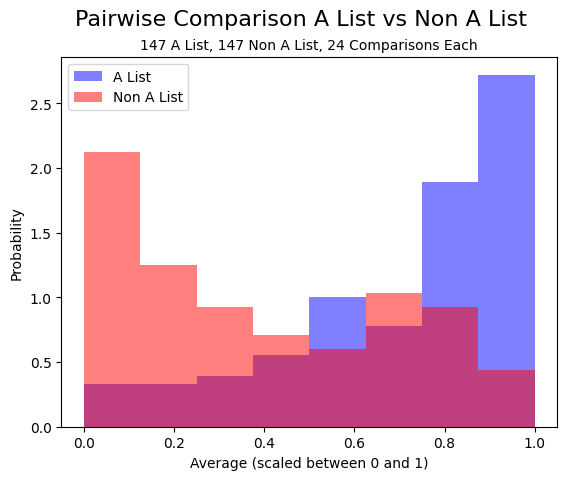

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV files
df1_path = "Part_1_Company_Testing/147_147_Companies/147_A_List_Pairwise_Averages.csv"
df2_path = "Part_1_Company_Testing/147_147_Companies/147_Non_A_List_Pairwise_Averages.csv"

df1 = pd.read_csv(df1_path)
df2 = pd.read_csv(df2_path)

# Convert Weighted_Average to numeric and handle errors
df1['Weighted_Average'] = pd.to_numeric(df1['Weighted_Average'], errors='coerce')
df2['Weighted_Average'] = pd.to_numeric(df2['Weighted_Average'], errors='coerce')

# Scale the data by dividing by 100
df1['Weighted_Average'] = df1['Weighted_Average'] / 100
df2['Weighted_Average'] = df2['Weighted_Average'] / 100

# Define your custom bins (scaled from 0 to 1)
bins = [0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1]

# Plot histogram for the first file (A List), with density normalization
plt.hist(df1['Weighted_Average'].dropna(), bins=bins, alpha=0.5, label='A List', color='blue', density=True)

# Plot histogram for the second file (Non A List), with density normalization
plt.hist(df2['Weighted_Average'].dropna(), bins=bins, alpha=0.5, label='Non A List', color='red', density=True)

# Add labels and title
plt.xlabel('Average (scaled between 0 and 1)')
plt.ylabel('Probability')
plt.suptitle('Pairwise Comparison A List vs Non A List', fontsize=16)
plt.title('147 A List, 147 Non A List, 24 Comparisons Each', fontsize=10)

# Add a legend to differentiate between the two files
plt.legend()

# Show the plot
plt.show()
